# Task6: Predictive Modelling

In [1]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


### Load the Saved Lasso Model

In [2]:
import pandas as pd
import joblib
# Load the trained Lasso model from file
lasso_model = joblib.load('lasso_model.pkl')


In [4]:
selected_features = [
    'rolling_mean_3d',
    'rolling_mean_7d',
    'rolling_kurtosis_10d',
    'rolling_skew_7d',
    'rolling_skew_10d'
]

### reading data

In [5]:
df = pd.read_csv('exploratory_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  2191 non-null   object 
 1   Subject               2191 non-null   object 
 2   body                  2191 non-null   object 
 3   from                  2191 non-null   object 
 4   roberta_neg           2191 non-null   float64
 5   roberta_neu           2191 non-null   float64
 6   roberta_pos           2191 non-null   float64
 7   label                 2191 non-null   object 
 8   weekly                2191 non-null   object 
 9   sentiment_score       2191 non-null   float64
 10  rolling_variance_3d   2189 non-null   float64
 11  rolling_mean_3d       2189 non-null   float64
 12  rolling_std_3d        2189 non-null   float64
 13  rolling_skew_3d       2189 non-null   float64
 14  rolling_kurtosis_3d   2189 non-null   float64
 15  rolling_variance_5d  

In [7]:
df['date'] = pd.to_datetime(df['date'])  # Convert the 'date' column to datetime
df.set_index('date', inplace=True)       # Set it as the index
df_numeric = df.select_dtypes(include='number')  # like sentiment_score, roberta_*
df_daily = df_numeric.resample('D').mean()

# Interpolate missing scores
df_daily['sentiment_score'] = df_daily['sentiment_score'].interpolate(method='linear')


In [8]:
df_numeric.head(50)

,roberta_neg,roberta_neu,roberta_pos,sentiment_score,rolling_variance_3d,rolling_mean_3d,rolling_std_3d,rolling_skew_3d,rolling_kurtosis_3d,rolling_variance_5d,...,rolling_std_30d,rolling_skew_30d,rolling_kurtosis_30d,message_volume,day_of_the_week,is_weekend,sentiment_lag_1,sentiment_lag_2,sentiment_lag_3,score
date,,,,,,,,,,,,,,,,,,,,,
2010-05-10,0.012207,0.492302,0.495490,0.483283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,0,0,NaN,NaN,NaN,1
2010-07-29,0.653594,0.316744,0.029662,-0.623932,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5,3,0,0.483283,NaN,NaN,-1
2011-07-25,0.043858,0.908734,0.047408,0.003550,0.308301,-0.045700,0.555248,-0.161668,-1.5,0.308301,...,0.555248,-0.161668,-1.500000,2,0,0,-0.623932,0.483283,NaN,0
2010-03-25,0.023093,0.845511,0.131396,0.108302,0.156812,-0.170693,0.395996,-0.651849,-1.5,0.211463,...,0.459851,-0.455357,-0.985068,3,3,0,0.003550,-0.623932,0.483283,0
2011-05-21,0.241674,0.686705,0.071622,-0.170052,0.019765,-0.019400,0.140589,-0.291904,-1.5,0.163901,...,0.404847,-0.232215,-0.765692,6,5,1,0.108302,0.003550,-0.623932,0
2011-10-23,0.041024,0.814124,0.144852,0.103829,0.025419,0.014026,0.159432,-0.706480,-1.5,0.093461,...,0.366821,-0.446333,-0.351480,4,6,1,-0.170052,0.108302,0.003550,0
2010-04-05,0.058766,0.906897,0.034337,-0.024429,0.018778,-0.030218,0.137032,-0.077465,-1.5,0.012987,...,0.334876,-0.470152,0.081820,5,0,0,0.103829,-0.170052,0.108302,0
2010-04-21,0.025823,0.619558,0.354618,0.328795,0.031971,0.136065,0.178805,0.320444,-1.5,0.034031,...,0.333278,-0.652635,0.073262,5,2,0,-0.024429,0.103829,-0.170052,0
2010-02-07,0.013873,0.767108,0.219019,0.205145,0.032127,0.169837,0.179240,-0.347848,-1.5,0.037796,...,0.317410,-0.831749,0.426240,4,6,1,0.328795,-0.024429,0.103829,0


In [9]:
df_daily.head(20)

,roberta_neg,roberta_neu,roberta_pos,sentiment_score,rolling_variance_3d,rolling_mean_3d,rolling_std_3d,rolling_skew_3d,rolling_kurtosis_3d,rolling_variance_5d,...,rolling_std_30d,rolling_skew_30d,rolling_kurtosis_30d,message_volume,day_of_the_week,is_weekend,sentiment_lag_1,sentiment_lag_2,sentiment_lag_3,score
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.057599,0.834241,0.108160,0.050562,0.033969,0.187667,0.184308,0.610362,-1.5,0.089255,...,0.417234,0.178521,-0.343999,1.0,4.0,0.0,0.115256,0.397184,-0.023306,0.000000
2010-01-02,0.098389,0.682210,0.219401,0.121012,0.187280,0.213609,0.392813,0.092289,-1.5,0.129767,...,0.405896,0.512169,0.178487,5.0,5.0,1.0,0.241521,0.278294,0.091514,0.000000
2010-01-03,0.152692,0.520098,0.327210,0.174519,0.087504,0.181826,0.254044,0.389142,-1.5,0.157571,...,0.399931,0.449792,-0.230918,4.0,6.0,1.0,0.239572,0.131388,0.368361,0.250000
2010-01-04,0.294330,0.585805,0.119865,-0.174465,0.162384,0.105917,0.346063,-0.695200,-1.5,0.156745,...,0.421739,0.187217,-0.135229,2.0,0.0,0.0,0.162840,0.329376,-0.352070,-0.500000
2010-01-05,0.044254,0.810747,0.145000,0.100746,0.152473,0.113493,0.375211,0.075076,-1.5,0.090070,...,0.348660,0.546414,1.064694,2.0,1.0,0.0,0.435132,-0.195399,-0.016905,0.000000
2010-01-06,0.152887,0.598795,0.248318,0.095432,0.005432,0.057953,0.069618,0.627971,-1.5,0.100365,...,0.437462,0.190365,-0.499621,2.0,2.0,0.0,0.048434,0.029992,0.459013,0.000000
2010-01-07,0.107864,0.838244,0.053892,-0.053973,0.158626,0.403262,0.398279,-0.670599,-1.5,0.387169,...,0.429724,-0.504738,0.467241,1.0,3.0,0.0,0.589115,0.674643,-0.419559,0.000000
2010-01-08,0.055004,0.524978,0.420018,0.365014,0.179038,0.236455,0.377341,0.064479,-1.5,0.195704,...,0.428708,0.212538,-0.547790,4.0,4.0,0.0,0.409783,-0.065433,0.072471,0.500000
2010-01-09,0.003639,0.443143,0.553218,0.549578,0.586710,-0.037651,0.765970,-0.580624,-1.5,0.296665,...,0.396990,0.145958,0.603895,1.0,5.0,1.0,0.241519,-0.904049,0.086826,1.000000


### Basic prediction for next 30 days

In [10]:
from prophet import Prophet  # Import the Prophet library for time series forecasting

# Reset index to get 'date' back as a column for Prophet compatibility
df_prophet = df_daily.reset_index()

# Rename columns to match Prophet's expected input format
df_prophet.rename(columns={'date': 'ds', 'sentiment_score': 'y'}, inplace=True)


In [11]:
model = Prophet()  # Instantiate the Prophet model with default parameters
model.fit(df_prophet)  # Fit the model on the prepared dataframe (with 'ds' and 'y' columns)


17:31:57 - cmdstanpy - INFO - Chain [1] start processing
17:31:58 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = model.make_future_dataframe(periods=30)  # Create a DataFrame extending 30 days beyond the original data


In [13]:
forecast = model.predict(future)  # Generate forecasts for historical and future dates


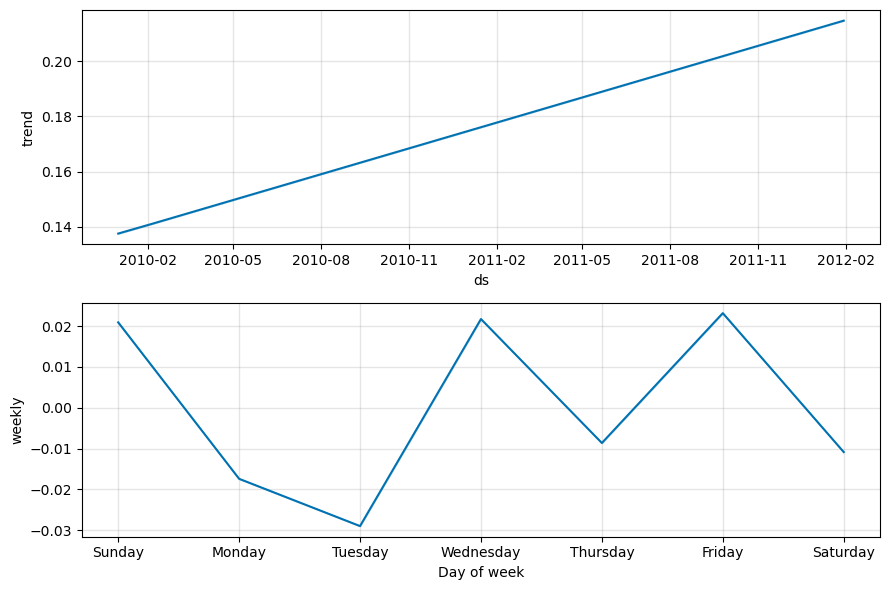

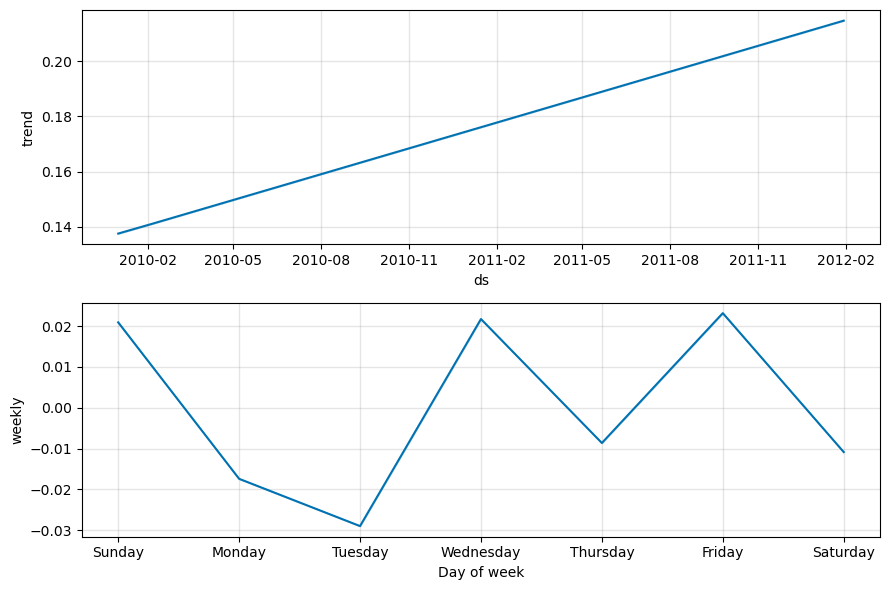

In [15]:
model.plot_components(forecast)  # Visualize the trend and seasonal components of the forecast


### comparing actual data with predicted data

In [16]:
# Number of days to forecast (test size)
test_size = 30

# Training data: exclude the last 30 days
train_df = df_prophet[:-test_size]

# Test data: the last 30 days to validate forecast
test_df = df_prophet[-test_size:]


In [17]:
from prophet import Prophet  # Import Prophet for time series forecasting

model = Prophet()            # Initialize the Prophet model with default settings
model.fit(train_df)          # Fit the model using the training dataset (excluding the last 30 days)


17:33:16 - cmdstanpy - INFO - Chain [1] start processing
17:33:16 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Generate future dates that include the test period (30 days ahead)
future = model.make_future_dataframe(periods=test_size)

# Predict values for the full range (training + test period)
forecast = model.predict(future)


In [19]:
# Extract only the forecasted period (last 30 days)
forecast_test = forecast[-test_size:]

# Create a copy of the actual test data
compare_df = test_df.copy()

# Add the forecasted values (yhat) to the test DataFrame for comparison
compare_df['yhat'] = forecast_test['yhat'].values


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Import error metric functions

# Calculate Mean Squared Error (MSE) between actual and predicted values
mse = mean_squared_error(compare_df['y'], compare_df['yhat'])

# Calculate Mean Absolute Error (MAE) between actual and predicted values
mae = mean_absolute_error(compare_df['y'], compare_df['yhat'])

# Print the error metrics with 4 decimal places
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


Mean Squared Error: 0.0502
Mean Absolute Error: 0.1850


### predictions without regressorsm

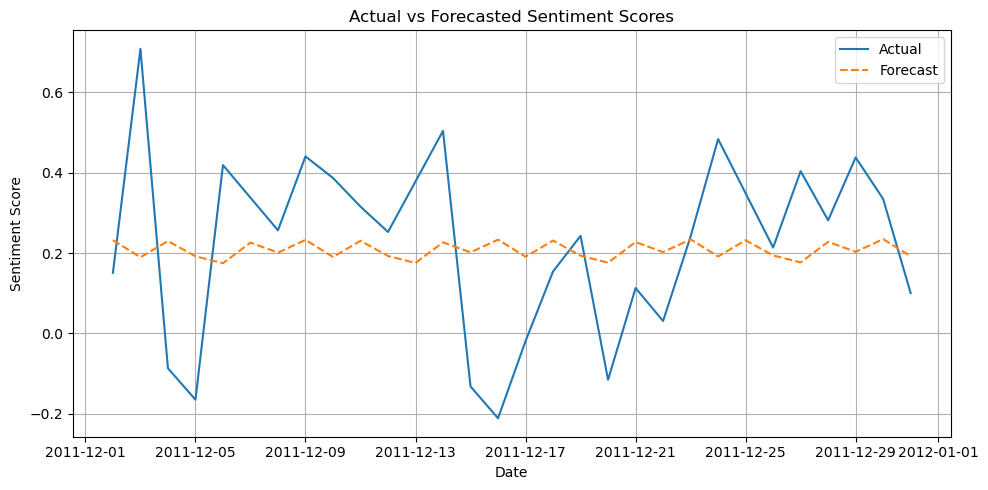

In [21]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Set figure size
plt.figure(figsize=(10, 5))

# Plot actual sentiment scores
plt.plot(compare_df['ds'], compare_df['y'], label='Actual')

# Plot forecasted sentiment scores
plt.plot(compare_df['ds'], compare_df['yhat'], label='Forecast', linestyle='--')

# Add title and axis labels
plt.title('Actual vs Forecasted Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')

# Display legend and grid
plt.legend()
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Adding regressors (features selected by lasso) to the model to improve prediction

In [25]:
def train_and_forecast_prophet_with_regressors(df, selected_features, target_col='sentiment_score', forecast_days=30):
    from prophet import Prophet
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import matplotlib.pyplot as plt

    # Step 1: Reset index and rename columns for Prophet format
    df_prophet = df.reset_index().rename(columns={'date': 'ds', target_col: 'y'})

    # Step 2: Retain only date, target, and selected regressors
    required_cols = ['ds', 'y'] + selected_features
    df_prophet = df_prophet[required_cols]

    # Step 3: Remove rows with missing values
    df_prophet = df_prophet.dropna()

    # Step 4: Split into training and testing sets
    train_df = df_prophet[:-forecast_days]
    test_df = df_prophet[-forecast_days:]

    # Step 5: Initialize Prophet model and add extra regressors
    model = Prophet()
    for reg in selected_features:
        model.add_regressor(reg)

    # Step 6: Train the model on training data
    model.fit(train_df)

    # Step 7: Prepare test input and forecast
    future = test_df[['ds'] + selected_features]  # Use same regressors in test set
    forecast = model.predict(future)

    # Step 8: Evaluate forecast against actual values
    test_df['yhat'] = forecast['yhat'].values
    mse = mean_squared_error(test_df['y'], test_df['yhat'])
    mae = mean_absolute_error(test_df['y'], test_df['yhat'])

    # Step 9: Plot actual vs forecasted values
    plt.figure(figsize=(20, 10))
    plt.plot(test_df['ds'], test_df['y'], label='Actual')
    plt.plot(test_df['ds'], test_df['yhat'], label='Forecast', linestyle='--')
    plt.title('Actual vs Forecasted Sentiment Scores with Regressors')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return forecast and evaluation metrics
    return forecast, {'mse': mse, 'mae': mae}


18:27:41 - cmdstanpy - INFO - Chain [1] start processing
18:27:41 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\mhfah\AppData\Local\Temp\ipykernel_29912\4165588519.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['yhat'] = forecast['yhat'].values


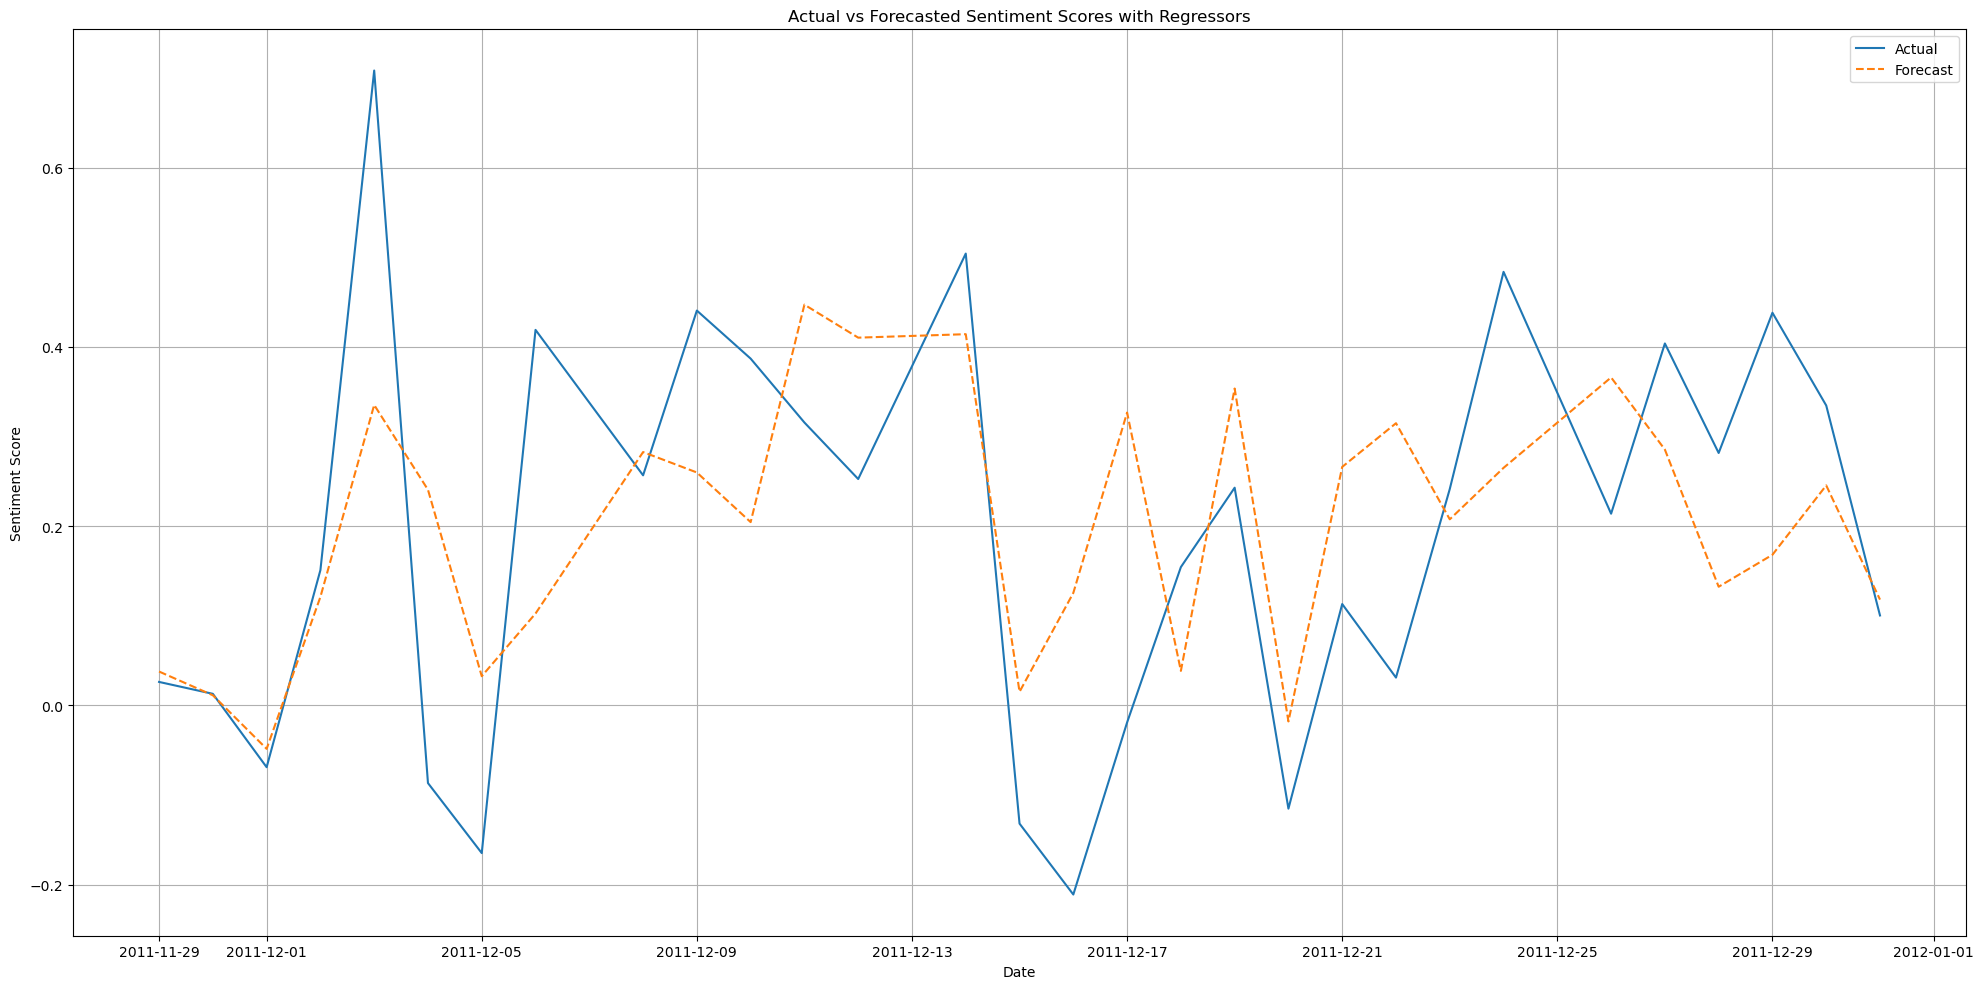

{'mse': 0.03622446880886591, 'mae': 0.1561626258488703}


In [26]:
# Define list of additional features (regressors) to include in the model
selected_features = [
    'rolling_mean_3d',
    'rolling_mean_7d',
    'rolling_kurtosis_10d',
    'rolling_skew_7d',
    'rolling_skew_10d'
]

# Call the custom forecasting function with the daily data and selected regressors
forecast, metrics = train_and_forecast_prophet_with_regressors(df_daily, selected_features)

# Print evaluation metrics (MSE and MAE)
print(metrics)


### Future prediction for next 30 days

17:34:49 - cmdstanpy - INFO - Chain [1] start processing
17:34:49 - cmdstanpy - INFO - Chain [1] done processing


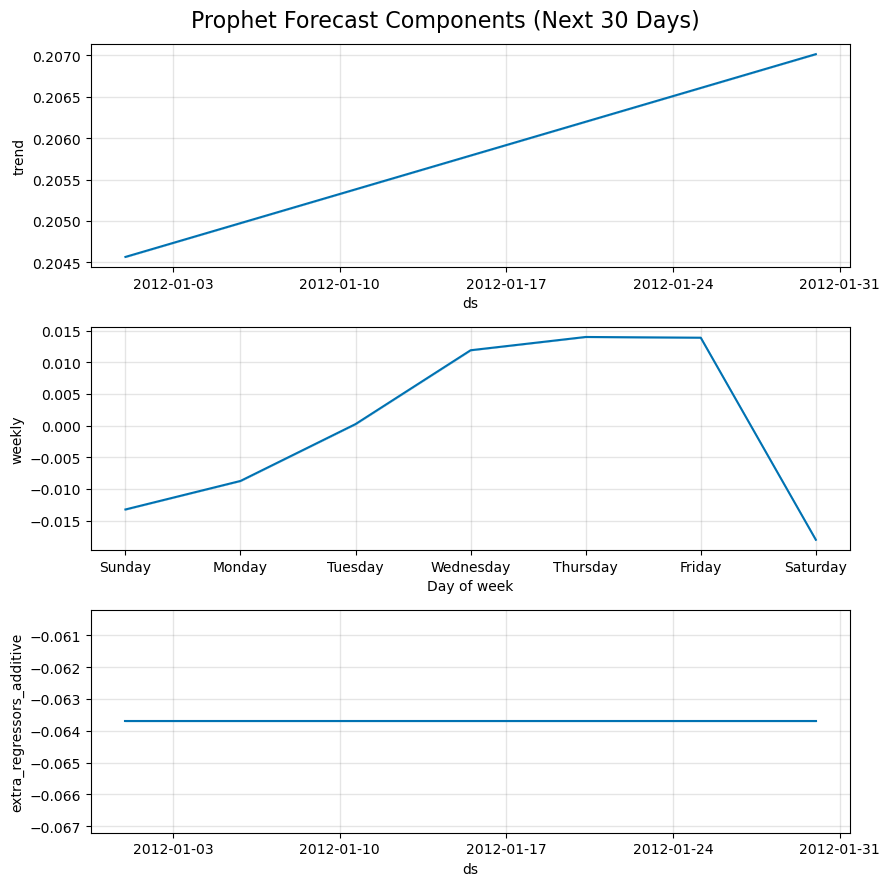

In [24]:
from prophet import Prophet  # Import Prophet
import matplotlib.pyplot as plt

# Define your selected regressors
selected_regressors = [
    'rolling_mean_3d',
    'rolling_mean_7d',
    'rolling_kurtosis_10d',
    'rolling_skew_7d',
    'rolling_skew_10d'
]

# Prepare DataFrame for Prophet
df_prophet = df_daily.reset_index()
df_prophet.rename(columns={'date': 'ds', 'sentiment_score': 'y'}, inplace=True)

# Keep only required columns
required_cols = ['ds', 'y'] + selected_regressors
df_prophet = df_prophet[required_cols]
df_prophet = df_prophet.dropna()

# Instantiate Prophet and add regressors
model = Prophet()
for reg in selected_regressors:
    model.add_regressor(reg)

# Fit the model
model.fit(df_prophet)

# Extract the last row to start forecasting 30 days forward
last_row = df_prophet.iloc[-1:].copy()
future_dates = pd.date_range(start=last_row['ds'].values[0], periods=31, freq='D')[1:]

# Create future DataFrame with placeholder regressor values (extend real regressors if you have them)
future = pd.DataFrame({'ds': future_dates})
for reg in selected_regressors:
    future[reg] = df_prophet[reg].iloc[-1]  # Use last known value or replace with smarter estimates

# Predict 30-day future
forecast = model.predict(future)

# Plot only the forecast components for the next 30 days
model.plot_components(forecast)
plt.suptitle("Prophet Forecast Components (Next 30 Days)", fontsize=16)
plt.tight_layout()
plt.show()


### Comparing linear regression with prophet

### Summary